In [16]:
import numpy as np
import fuzzy
import matplotlib.pyplot as plt

In [18]:
fis = fuzzy.mandani()
fis.add_var({"type":"input","name":"pop","range":[0.0,1.0]})
fis.add_var({"type":"input","name":"fav","range":[0.0,1.0]})
fis.add_var({"type":"output","name":"ctrl","range":[0.0,0.5]})

fis.add_mfs({"vartype":"input","varname":"pop","mfname":"BI","params":[0.0,0.0,0.20]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"B","params":[0.0,0.20,0.4]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"M","params":[0.2,0.4,0.6]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"MA","params":[0.4,0.6,0.8]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"A","params":[0.6,0.8,1.0]})
fis.add_mfs({"vartype":"input","varname":"pop","mfname":"AT","params":[0.8,1.0,1.0]})


fis.add_mfs({"vartype":"input","varname":"fav","mfname":"BI","params":[0.0,0.0,0.20]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"B","params":[0.0,0.20,0.4]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"M","params":[0.2,0.4,0.6]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"MA","params":[0.4,0.6,0.8]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"A","params":[0.6,0.8,1.0]})
fis.add_mfs({"vartype":"input","varname":"fav","mfname":"AT","params":[0.8,1.0,1.0]})


fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"BI","params":[0.0,0.0,0.10]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"B","params":[0.0,0.10,0.2]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"M","params":[0.1,0.2,0.3]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"MA","params":[0.2,0.3,0.4]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"A","params":[0.3,0.4,0.5]})
fis.add_mfs({"vartype":"output","varname":"ctrl","mfname":"AT","params":[0.4,0.5,0.5]})



#cria regras
for p in ["BI","B","M","MA","A","AT"]:
    for f in ["BI","B","M","MA","A","AT"]:
        fis.add_rule({"pop":p,"fav":f},{"ctrl":"AT"})


In [12]:
fis.eval([0,0])

{'ctrl': 0.03250241354556031}

In [19]:
def dinamica(to,po,n):
    p = [po]
    fcn = lambda t: 1-0.5*np.cos(2*np.pi*t/12)
    for i in range(n):
        fav = fcn(to+i)
        res = fis.eval([p[i],fav]) 
        pn = (1+fav)*p[i]*(1-res["ctrl"])
        p.append(pn)
    
    return p


In [20]:
pp = dinamica(0,0.1,12)

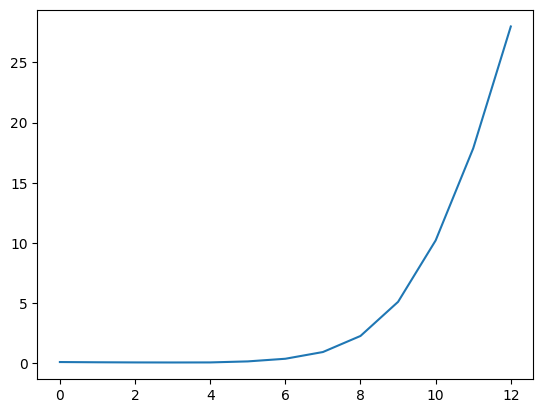

In [21]:
plt.plot(pp)